<a href="https://colab.research.google.com/github/aoifekeane/EE475-Project/blob/main/k_modes_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kmodes

- Installing the k-modes library

In [ ]:

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

- importing dependencies

In [ ]:
list_of_types = ['waltz', 'march','three-two',
                 'mazurka', 'strathspey', 
                 'slip jig', 'barndance']

- creating a list of types of tunes that we don't attempt to cluster

In [ ]:
df = pd.read_csv(r"/content/drive/MyDrive/project/sets.csv")
set_data = set_data = df[['tuneset','settingorder', 'name','type','mode']]
set_data = set_data.groupby('tuneset').filter(lambda x: len(x) == 3)


- reading in the set information
- filtering it down to sets with only three tunes in them

In [ ]:
tunes = ['reel', 'jig', 'polka', 'hornpipe', 'slide']

- create a list of tunes that we do cluster for

In [ ]:
discrete_tunesets = set_data.tuneset.unique()
df_dict = {elem : pd.DataFrame for elem in discrete_tunesets}
i = 0
for key in df_dict.keys():
  i +=1
  df_dict[key] = set_data[:][set_data.tuneset == key]

- creates a dictionary of all tunesets

In [ ]:


from kmodes.kmodes import KModes
j = 0
c = np.empty((5, 5), dtype = float)
for t in tunes:
  k = []
  i = 0
 
  for key in df_dict.keys():
    samp = df_dict[key]
    if samp.iloc[0,:]['type'] in list_of_types:
      continue
    elif samp.iloc[0,:]['type'] == t:
      k.append([samp.iloc[1,:]['type'], samp.iloc[2,:]['type']])
      i+=1
    else:
      continue
  if len(k)>0:
    cost = []
    for num_clusters in list(range(2,7)):
      km_cao_t = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
      cao_types = km_cao_t.fit_predict(k)
      cluster_centroids = pd.DataFrame(km_cao_t.cluster_centroids_)
      cluster_centroids.columns = ['Tune 1', 'Tune 2']
      c[j][num_clusters-2] = km_cao_t.cost_
    j+=1
    

- records the cost of k-modes clustering for each tunes type
- clusters range from k=2 to k=7
- cost recorded per k for each tune

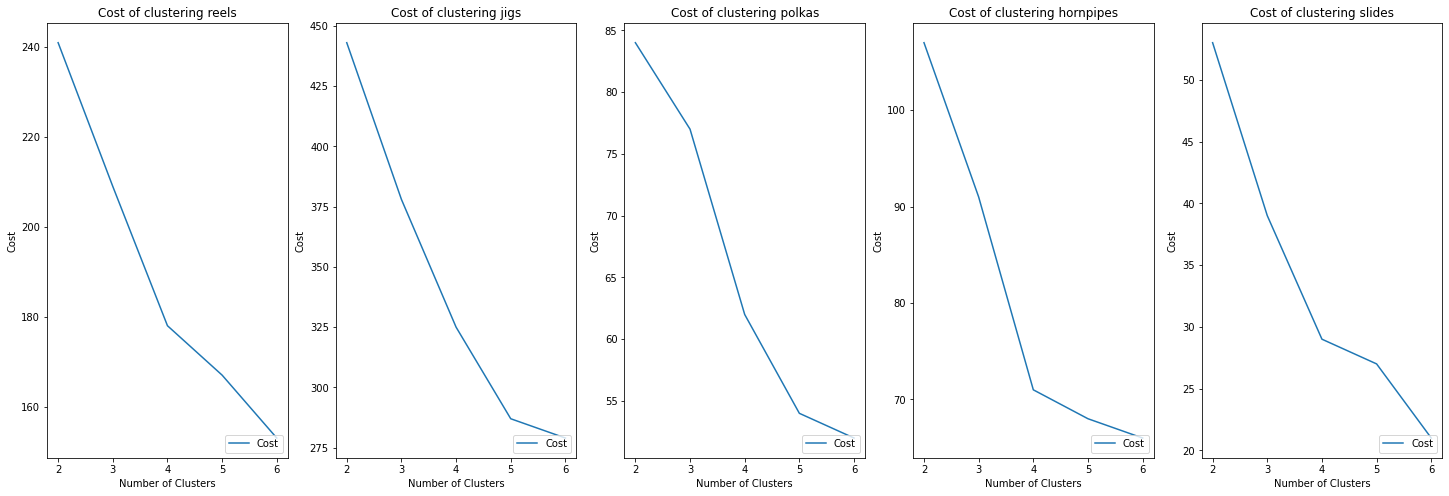

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

k_range = range(2,7,1)
plt.figure(figsize=(25, 8))
for i in range(0,5):
  plt.subplot(1, 5, i+1)
  plt.plot(k_range, c[i], label='Cost')
  plt.legend(loc='lower right')
  plt.title('Cost of clustering '+tunes[i]+'s')
  plt.xlabel('Number of Clusters')
  plt.ylabel('Cost')


- plots cost against values fo k for each tune
- this helps us find the optimal value of k 
  - elbow method

In [ ]:
meters_to_no_clusters = {
    'reel': 4,
    'jig': 5,
    'polka': 3,
    'hornpipe': 4,
    'slide':4}

- number of clusters per tune type

In [ ]:
from kmodes.kmodes import KModes
from collections import Counter
for t in tunes:
  k = []
  i = 0
  print('------------')
  print(t)
  for key in df_dict.keys():
    samp = df_dict[key]
    if samp.iloc[0,:]['type'] in list_of_types:
      continue
    elif samp.iloc[0,:]['type'] == t:
      k.append([samp.iloc[1,:]['type'], samp.iloc[2,:]['type']])
      i+=1
    else:
      continue
  if len(k)>0:
    km_cao_t = KModes(n_clusters=meters_to_no_clusters[t], init = "Cao", n_init = 1, verbose=1)
    cao_types = km_cao_t.fit_predict(k)
    cluster_centroids = pd.DataFrame(km_cao_t.cluster_centroids_)
    cluster_centroids.columns = ['Tune 1', 'Tune 2']
    print(Counter(cao_types))
    print(cluster_centroids)
    

------------
reel
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 178.0
Counter({0: 3707, 1: 78, 2: 32, 3: 31})
  Tune 1    Tune 2
0   reel      reel
1   reel       jig
2   reel  hornpipe
3    jig      reel
------------
jig
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 287.0
Counter({0: 2524, 1: 237, 2: 65, 3: 53, 4: 38})
  Tune 1    Tune 2
0    jig       jig
1    jig      reel
2    jig  slip jig
3    jig     slide
4   reel       jig
------------
polka
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 15, cost: 77.0
Counter({0: 417, 1: 29, 2: 7})
  Tune 1 Tune 2
0  polka  polka
1   reel   reel
2   reel  polka
------------
hornpipe
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 41, cost: 71.0
Counter({0: 279, 1: 63, 

- performs k-modes clustering across tune types
- data only filtered so that the first tune in the set aligns with the tunes we want to cluster for
- number of clusters for each type of tune as determine previously
- k-modes algorithm uses cao initialisation
- counts the number of data points in each cluster to get the weights associated with them, since they are not balanced
- prints the centroids of each cluster, as the tune types of the second and thrid tunes in a set 